In [246]:
from qiskit import Aer, QuantumCircuit, execute

In [247]:
def dotprod(a, b):
    temp_sum = 0
    for i in range(len(a)):
        temp_sum += int(a[i])*int(b[i])
    return temp_sum%2

def oracle(circ, b):
    # TODO generalize this function
    for i, char in enumerate(b):
        circ.cx(i, i+len(b))
    
    i = len(b)-1
    k = 0
    while i > -1:
        if b[i] == '1':
            #for j in range(i+len(b), 2*len(b)):
            circ.cx(k,k+len(b))
            break
        i -= 1
        k += 1
    
    i -= 1
    
    for j in range(k+1,len(b)):
        if b[i] == '1':        
            circ.cx(k,j+len(b))
            
        i -= 1

In [248]:
# Main function
b = '1010'
n = len(b)
circ = QuantumCircuit(n*2, n)

circ.h(range(n))
circ.barrier()
oracle(circ, b)
circ.barrier()
circ.h(range(n))

circ.measure(range(n), range(n))

backend = Aer.get_backend('qasm_simulator')
shots = 1024
job = execute(circ, backend=backend, shots=shots)
results = job.result()
counts = results.get_counts()

for code in counts:
    print("(" + str(b) + " dot " + str(code) + ")%2 = " + str(dotprod(b, code)))

(1010 dot 0000)%2 = 0
(1010 dot 1110)%2 = 0
(1010 dot 0100)%2 = 0
(1010 dot 1111)%2 = 0
(1010 dot 1011)%2 = 0
(1010 dot 0001)%2 = 0
(1010 dot 0101)%2 = 0
(1010 dot 1010)%2 = 0


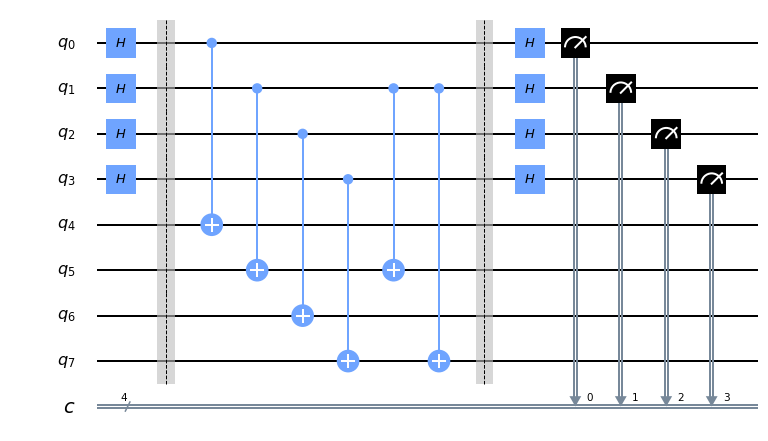

In [249]:
circ.draw(output='mpl')